In [1]:
import pandas as pd
import numpy  as np

In [2]:
casurl = 'https://data.rivm.nl/covid-19/'
casfil = 'COVID-19_casus_landelijk.csv'

url = casurl + casfil

!wget -N $url

--2023-03-20 09:24:27--  https://data.rivm.nl/covid-19/COVID-19_casus_landelijk.csv
Resolving data.rivm.nl (data.rivm.nl)... 131.224.250.75, 2001:610:430:ffff::16:198
Connecting to data.rivm.nl (data.rivm.nl)|131.224.250.75|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 585601581 (558M) [text/csv]
Saving to: ‘COVID-19_casus_landelijk.csv’

COVID-19_casus_land 100%[===================>] 558.47M  7.36MB/s    in 81s     

2023-03-20 09:25:47 (6.92 MB/s) - ‘COVID-19_casus_landelijk.csv’ saved [585601581/585601581]



In [3]:
df_case = pd.read_csv(
    casfil,
    sep=';',
    parse_dates=[1, 2],
    infer_datetime_format=True,
)
(
    df_case
    .tail(5)
    .transpose()
    .loc[:, ::-1]
)

6590356              6590355  \
Version                                     7                    7   
Date_file                 2023-03-17 10:00:00  2023-03-17 10:00:00   
Date_statistics           2023-03-17 00:00:00  2023-03-17 00:00:00   
Date_statistics_type                      DPL                  DPL   
Agegroup                                  90+                60-69   
Sex                                   Unknown              Unknown   
Province                              Zeeland              Zeeland   
Deceased                              Unknown              Unknown   
Week_of_death                             NaN                  NaN   
Municipal_health_service          GGD Zeeland          GGD Zeeland   

                                      6590354              6590353  \
Version                                     7                    7   
Date_file                 2023-03-17 10:00:00  2023-03-17 10:00:00   
Date_statistics           2023-03-17 00:00:00  2023-03-17 00:00:00   
Date_statistics_type                      DPL                  DPL   
Agegroup                                80-89                70-79   
Sex                                   Unknown              Unknown   
Province                              Zeeland              Zeeland   
Deceased                              Unknown              Unknown   
Week_of_death                             NaN                  NaN   
Municipal_health_service          GGD Zeeland          GGD Zeeland   

                                      6590352  
Version                                     7  
Date_file                 2023-03-17 10:00:00  
Date_statistics           2023-03-17 00:00:00  
Date_statistics_type                      DPL  
Agegroup                                  90+  
Sex                                   Unknown  
Province                              Zeeland  
Deceased                              Unknown  
Week_of_death                             NaN  
Municipal_health_service          GGD Zeeland

In [4]:
# Define period labels
df_case['period'] = (
    (
        (
            df_case
            ['Date_statistics']
            .dt
            .isocalendar()
            .year
            * 100
        )
        +
        (
            df_case
            ['Date_statistics']
            .dt
            .isocalendar()
            .week
        )
    )
    .apply(str)
    .apply(
        lambda x: (
            x[:4]
            + 'W'
            + x[4:]
        )
    )
)
# Define group labels
df_case['groups'] = (
    (
        df_case
        ['Sex']
        + ' '
    )
    +
    (
        df_case
        ['Agegroup']
    )
)
(
    df_case
    .tail(5)
#    .head(5)
    .transpose()
    .loc[:, ::-1]
)

6590356              6590355  \
Version                                     7                    7   
Date_file                 2023-03-17 10:00:00  2023-03-17 10:00:00   
Date_statistics           2023-03-17 00:00:00  2023-03-17 00:00:00   
Date_statistics_type                      DPL                  DPL   
Agegroup                                  90+                60-69   
Sex                                   Unknown              Unknown   
Province                              Zeeland              Zeeland   
Deceased                              Unknown              Unknown   
Week_of_death                             NaN                  NaN   
Municipal_health_service          GGD Zeeland          GGD Zeeland   
period                                2023W11              2023W11   
groups                            Unknown 90+        Unknown 60-69   

                                      6590354              6590353  \
Version                                     7                    7   
Date_file                 2023-03-17 10:00:00  2023-03-17 10:00:00   
Date_statistics           2023-03-17 00:00:00  2023-03-17 00:00:00   
Date_statistics_type                      DPL                  DPL   
Agegroup                                80-89                70-79   
Sex                                   Unknown              Unknown   
Province                              Zeeland              Zeeland   
Deceased                              Unknown              Unknown   
Week_of_death                             NaN                  NaN   
Municipal_health_service          GGD Zeeland          GGD Zeeland   
period                                2023W11              2023W11   
groups                          Unknown 80-89        Unknown 70-79   

                                      6590352  
Version                                     7  
Date_file                 2023-03-17 10:00:00  
Date_statistics           2023-03-17 00:00:00  
Date_statistics_type                      DPL  
Agegroup                                  90+  
Sex                                   Unknown  
Province                              Zeeland  
Deceased                              Unknown  
Week_of_death                             NaN  
Municipal_health_service          GGD Zeeland  
period                                2023W11  
groups                            Unknown 90+

In [5]:
# Pivot to period rows with group columns
df_heat = (
    df_case
    [
        df_case
        ['Municipal_health_service']
        != ''
    ]
    .pivot_table(
        index='period',
        columns='groups',
        values='Date_statistics',
        aggfunc='count',
    )
    .fillna(0)
)
# Select columns to use, optionally subset or use relative numbers
#df_heat['total'] = (
#    df_heat[df_heat.columns[0:24]]
#    .sum(axis=1)
#)
df_heat = (
    df_heat
    [
        df_heat
        .columns[0:24]
    ]
#    .loc['2020W26':]
#    .loc['2022W20':]
#    .loc['2022W22':]
#    .loc['2021W01':]
#    .loc['2022W01':]
#    .div(
#        df_heat['total'],
#        axis='index',
#    )
)
# Use this for relative growth numbers
#df_heat = df_heat / df_heat.shift()
(
    df_heat
    .tail(5)
    .loc[::-1]
    .transpose()
)

period          2023W11  2023W10  2023W09  2023W08  2023W07
groups                                                     
Female 0-9         21.0     56.0     45.0     50.0     43.0
Female 10-19        8.0     30.0     32.0     83.0     72.0
Female 20-29       32.0     99.0    151.0    320.0    226.0
Female 30-39       48.0    156.0    153.0    258.0    207.0
Female 40-49       59.0    155.0    176.0    275.0    229.0
Female 50-59       86.0    195.0    255.0    360.0    308.0
Female 60-69       97.0    256.0    263.0    293.0    238.0
Female 70-79      151.0    365.0    429.0    322.0    299.0
Female 80-89      170.0    492.0    507.0    392.0    350.0
Female 90+         67.0    217.0    254.0    179.0    150.0
Female <50          0.0      0.0      0.0      0.0      0.0
Female Unknown      0.0      0.0      0.0      0.0      0.0
Male 0-9           28.0     62.0     62.0     54.0     34.0
Male 10-19         11.0     27.0     32.0     51.0     66.0
Male 20-29         13.0     64.0     90.0    177.0    131.0
Male 30-39         32.0    112.0    104.0    168.0    161.0
Male 40-49         34.0     94.0    114.0    175.0    157.0
Male 50-59         60.0    173.0    181.0    268.0    245.0
Male 60-69         87.0    245.0    268.0    279.0    278.0
Male 70-79        182.0    441.0    470.0    412.0    314.0
Male 80-89        180.0    411.0    410.0    344.0    304.0
Male 90+           43.0     95.0    119.0     95.0     73.0
Male <50            0.0      0.0      0.0      0.0      0.0
Male Unknown        0.0      0.0      0.0      0.0      0.0

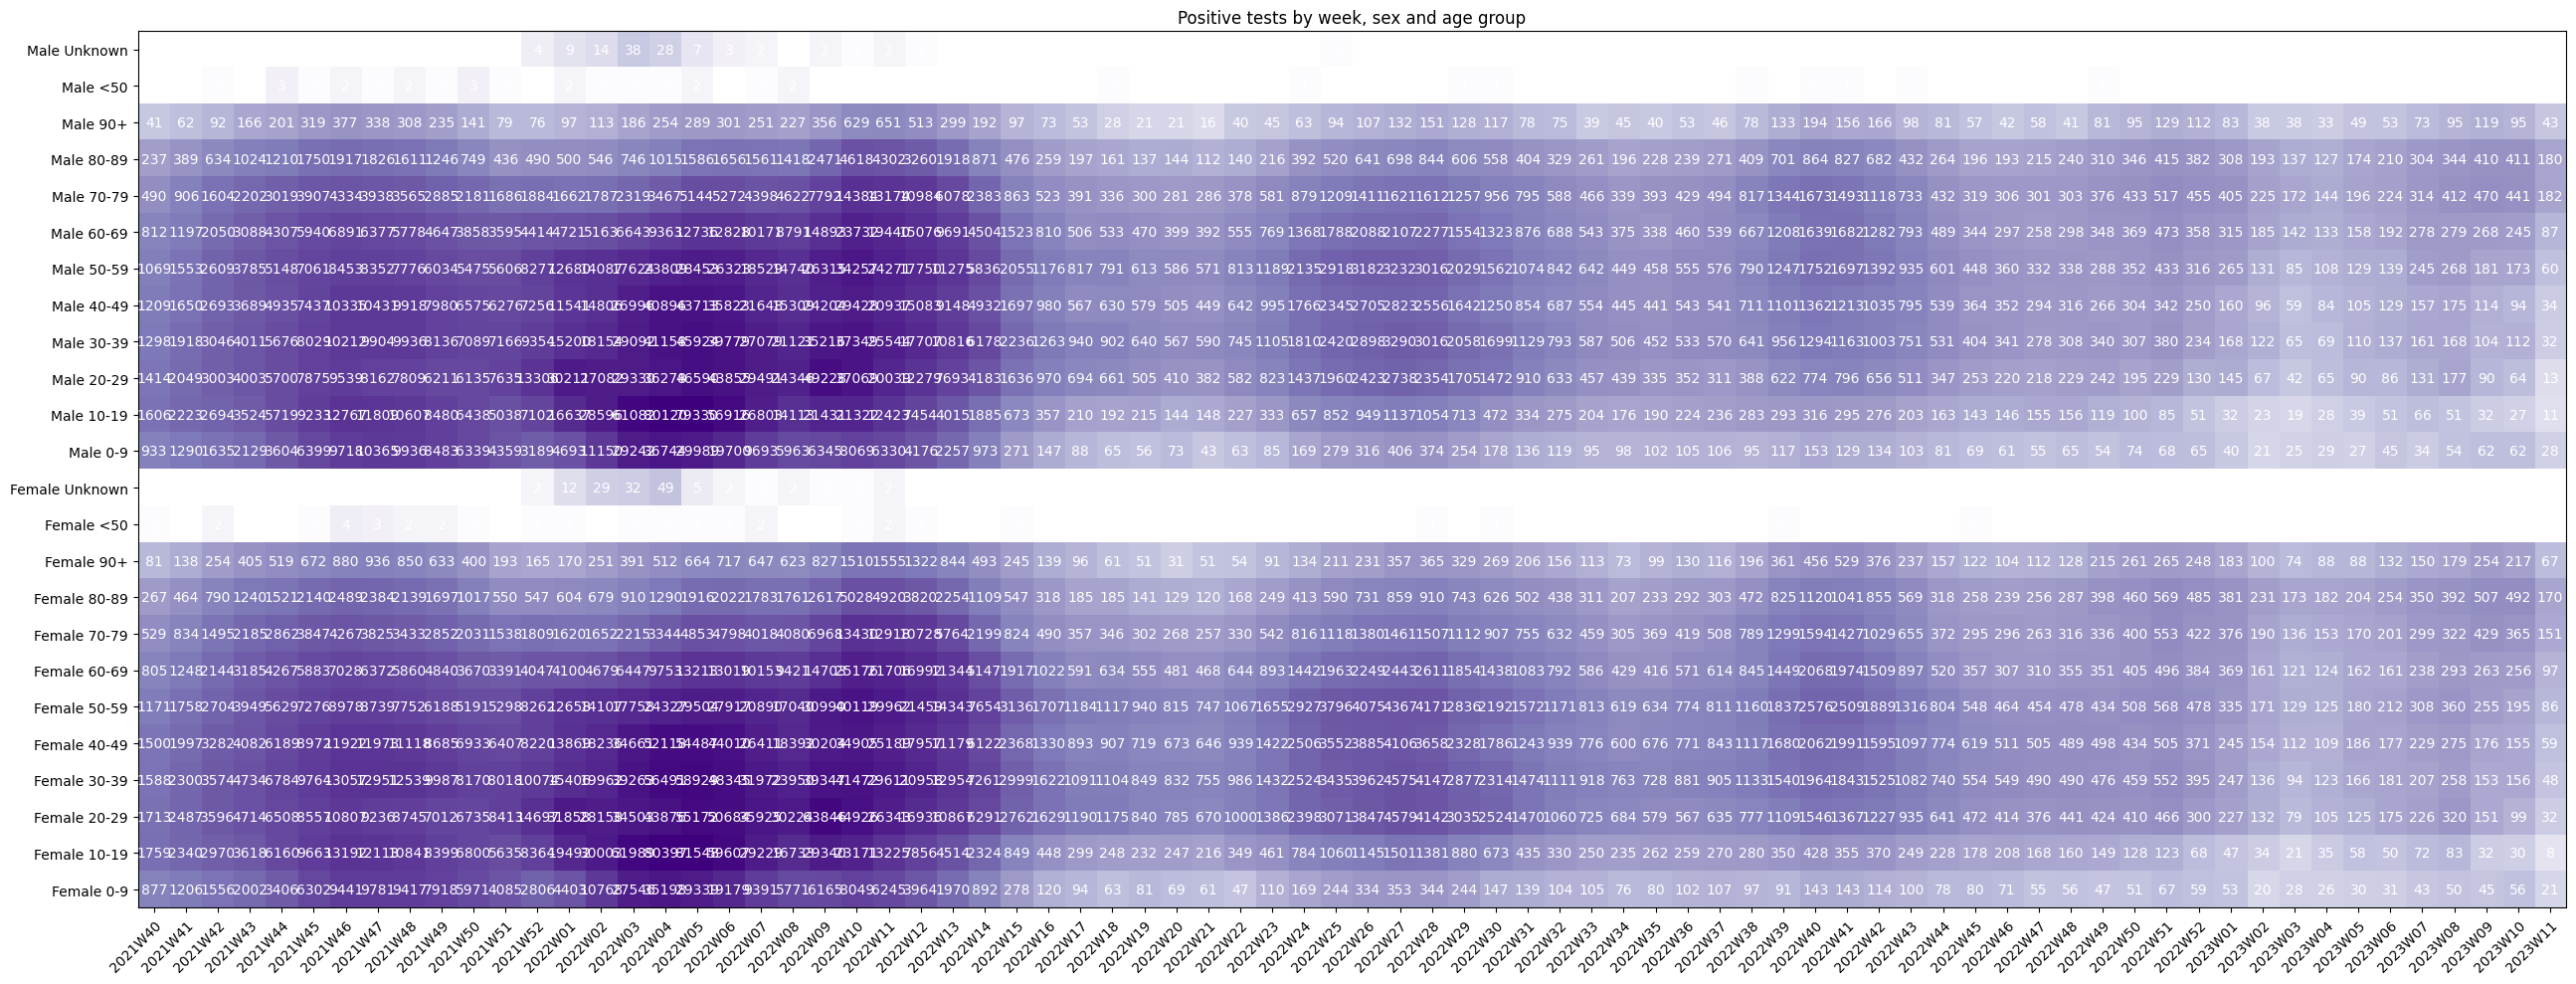

In [6]:
import matplotlib.pyplot as plt

# Define arrays of row and column headers
periods   = df_heat.index
agegroups = df_heat.columns

# Output size may have to be adjusted to data length eventually
fig, ax = plt.subplots(
    figsize=(26, 10),
)

# Heatmap on transposed data, X-axis inverted
heatmap = plt.imshow(
    np.log(
        df_heat
        [df_heat > 0]
        .loc[:]
        .transpose()
    ),
    cmap='Purples',
    interpolation='nearest',
    aspect='auto',
    origin='lower',
)

# Every value is an axis tick
ax.set_xticks(np.arange(len(periods)))
ax.set_yticks(np.arange(len(agegroups)))

ax.set_xticklabels(periods)
ax.set_yticklabels(agegroups)

# X labels diagonally
plt.setp(
    ax.get_xticklabels(),
    rotation=45,
    ha='right',
    rotation_mode='anchor',
)

# Convert dataframe to numpy format
np_heat = (
    df_heat
    .to_numpy()
)

# Set numbers as text labels
for i in range(len(periods)):
    for j in range(len(agegroups)):
        text = ax.text(
            i, j,
            int(np_heat[i, j]),
            ha='center',
            va='center',
            color='w',
        )

ax.set_title('Positive tests by week, sex and age group')
fig.tight_layout()
plt.show()